In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

# **MIMIC**

## **Loading data and creating Signals objects**

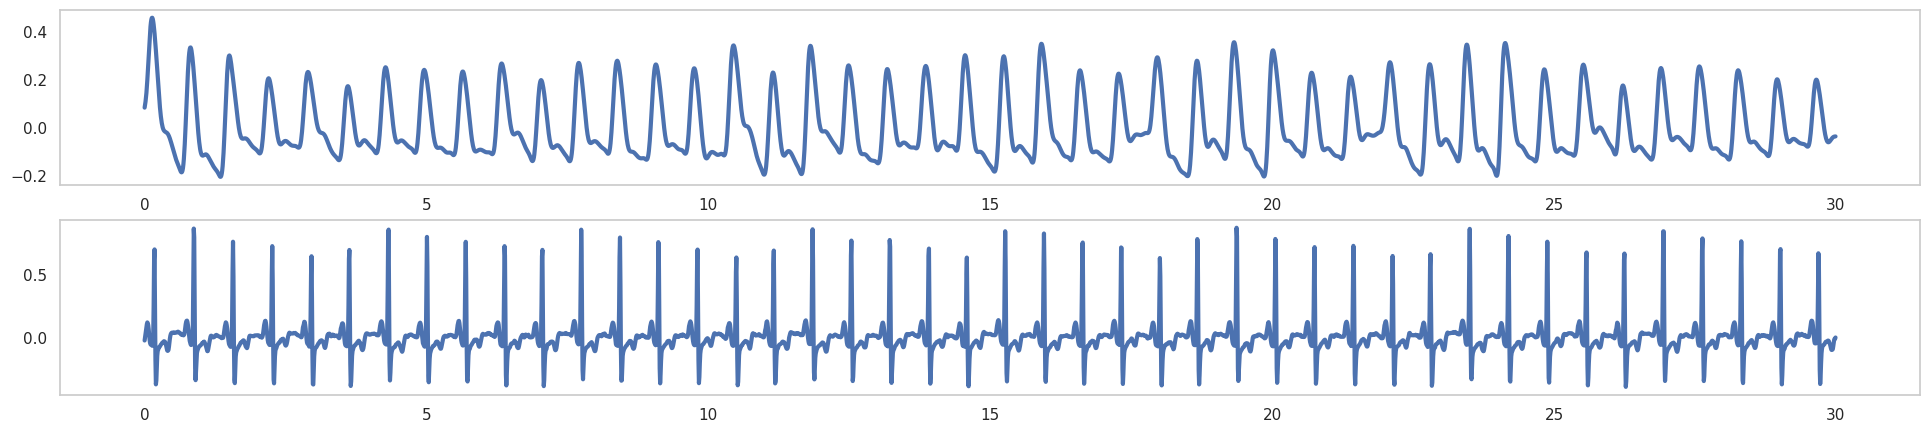

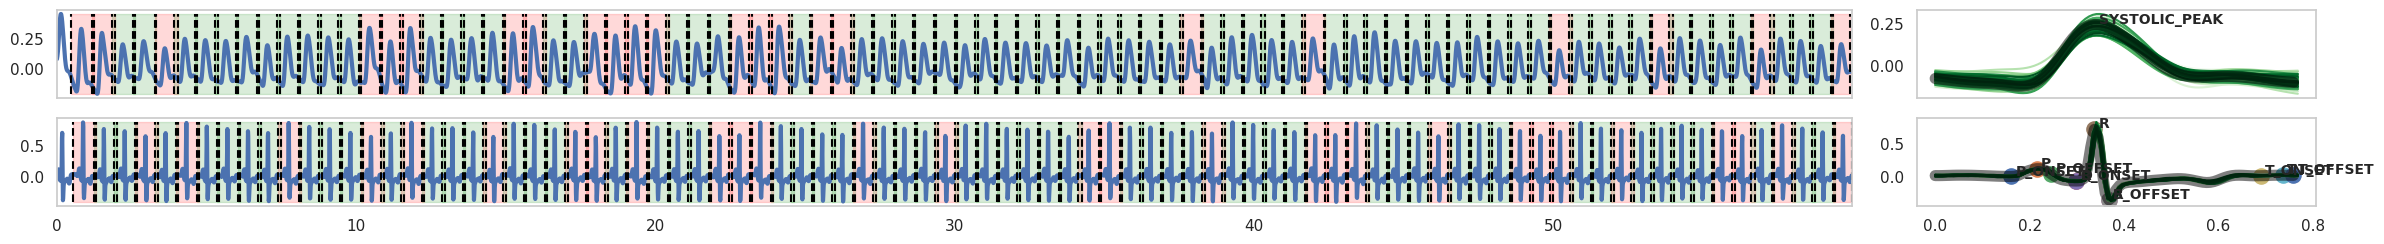

In [15]:
from msr.data.download.mimic import load_mimic_raw_tensors_for_split, FS
from msr.data.measurements import MimicMeasurement

data, targets = load_mimic_raw_tensors_for_split("val", "sbp_dbp_avg")
data, targets = data.numpy(), targets.numpy()
sample = data[222]
ppg, ecg = sample.T
measurement = MimicMeasurement(ppg, ecg, FS)
measurement.set_beats(source_channel='ecg', align_to_peak=True)
measurement.set_agg_beat()
ecg_sig = measurement['ecg']

fig, axes = plt.subplots(2, 1, figsize=(24, 5))
measurement.plot(0, 30, axes=axes)
measurement.plot_beats_segmentation(invalid=False)

{'basic__mean': 0.2918509186351706,
 'basic__std': 0.16610085818977965,
 'basic__median': 0.2755905511811024,
 'basic__skewness': 3.2856043895034572,
 'basic__kurtosis': 18.38771556353594,
 'peaks_troughs__peaks__mean': 0.7577494838278185,
 'peaks_troughs__peaks__std': 0.06837879780174419,
 'peaks_troughs__peaks__median': 0.7582132729851377,
 'peaks_troughs__peaks__skewness': 0.0695626550707526,
 'peaks_troughs__peaks__kurtosis': -0.9783844824641754,
 'peaks_troughs__troughs__mean': -0.3687442216373877,
 'peaks_troughs__troughs__std': 0.015823763020480726,
 'peaks_troughs__troughs__median': -0.36992269710165004,
 'peaks_troughs__troughs__skewness': 0.05187892376123656,
 'peaks_troughs__troughs__kurtosis': -0.8241560880766476,
 'peaks_troughs__amplitudes__mean': 1.126493705465206,
 'peaks_troughs__amplitudes__std': 0.05604981248684102,
 'peaks_troughs__amplitudes__median': 1.1273214019672464,
 'peaks_troughs__amplitudes__skewness': 0.011598415998422398,
 'peaks_troughs__amplitudes__kurt

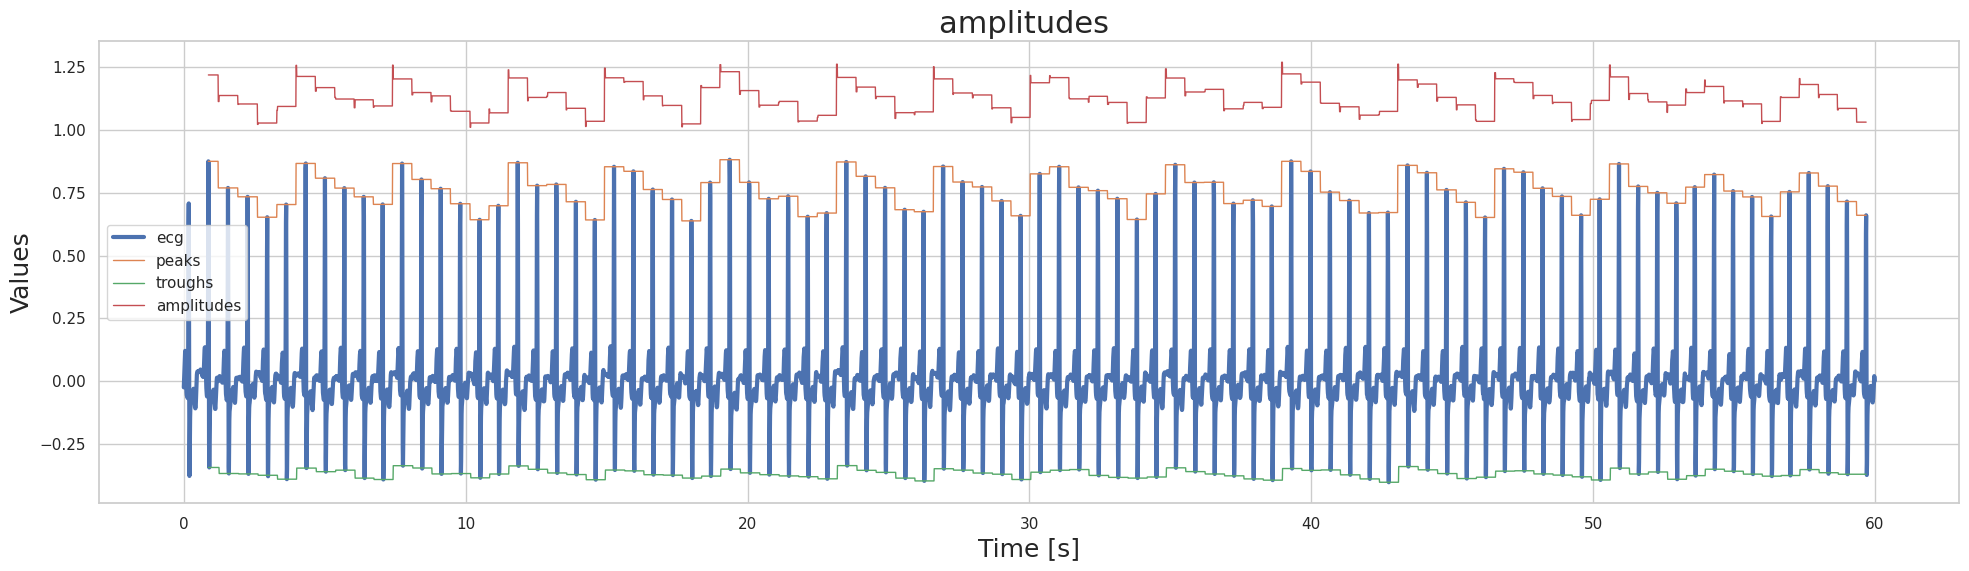

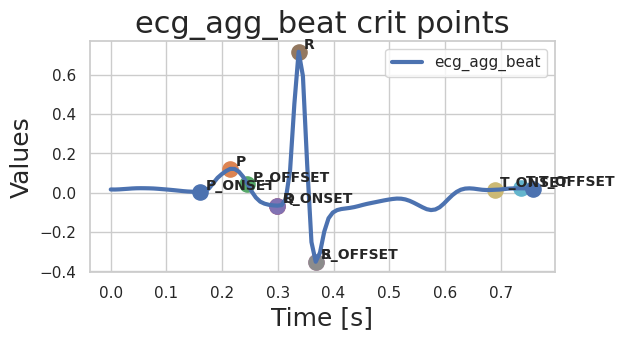

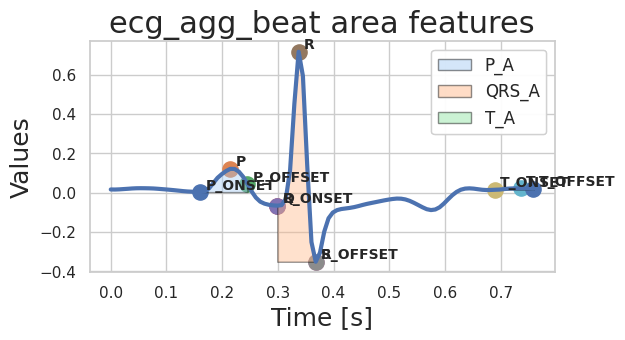

In [16]:
ecg_sig.extract_features(False, True)

# **PTB-XL**

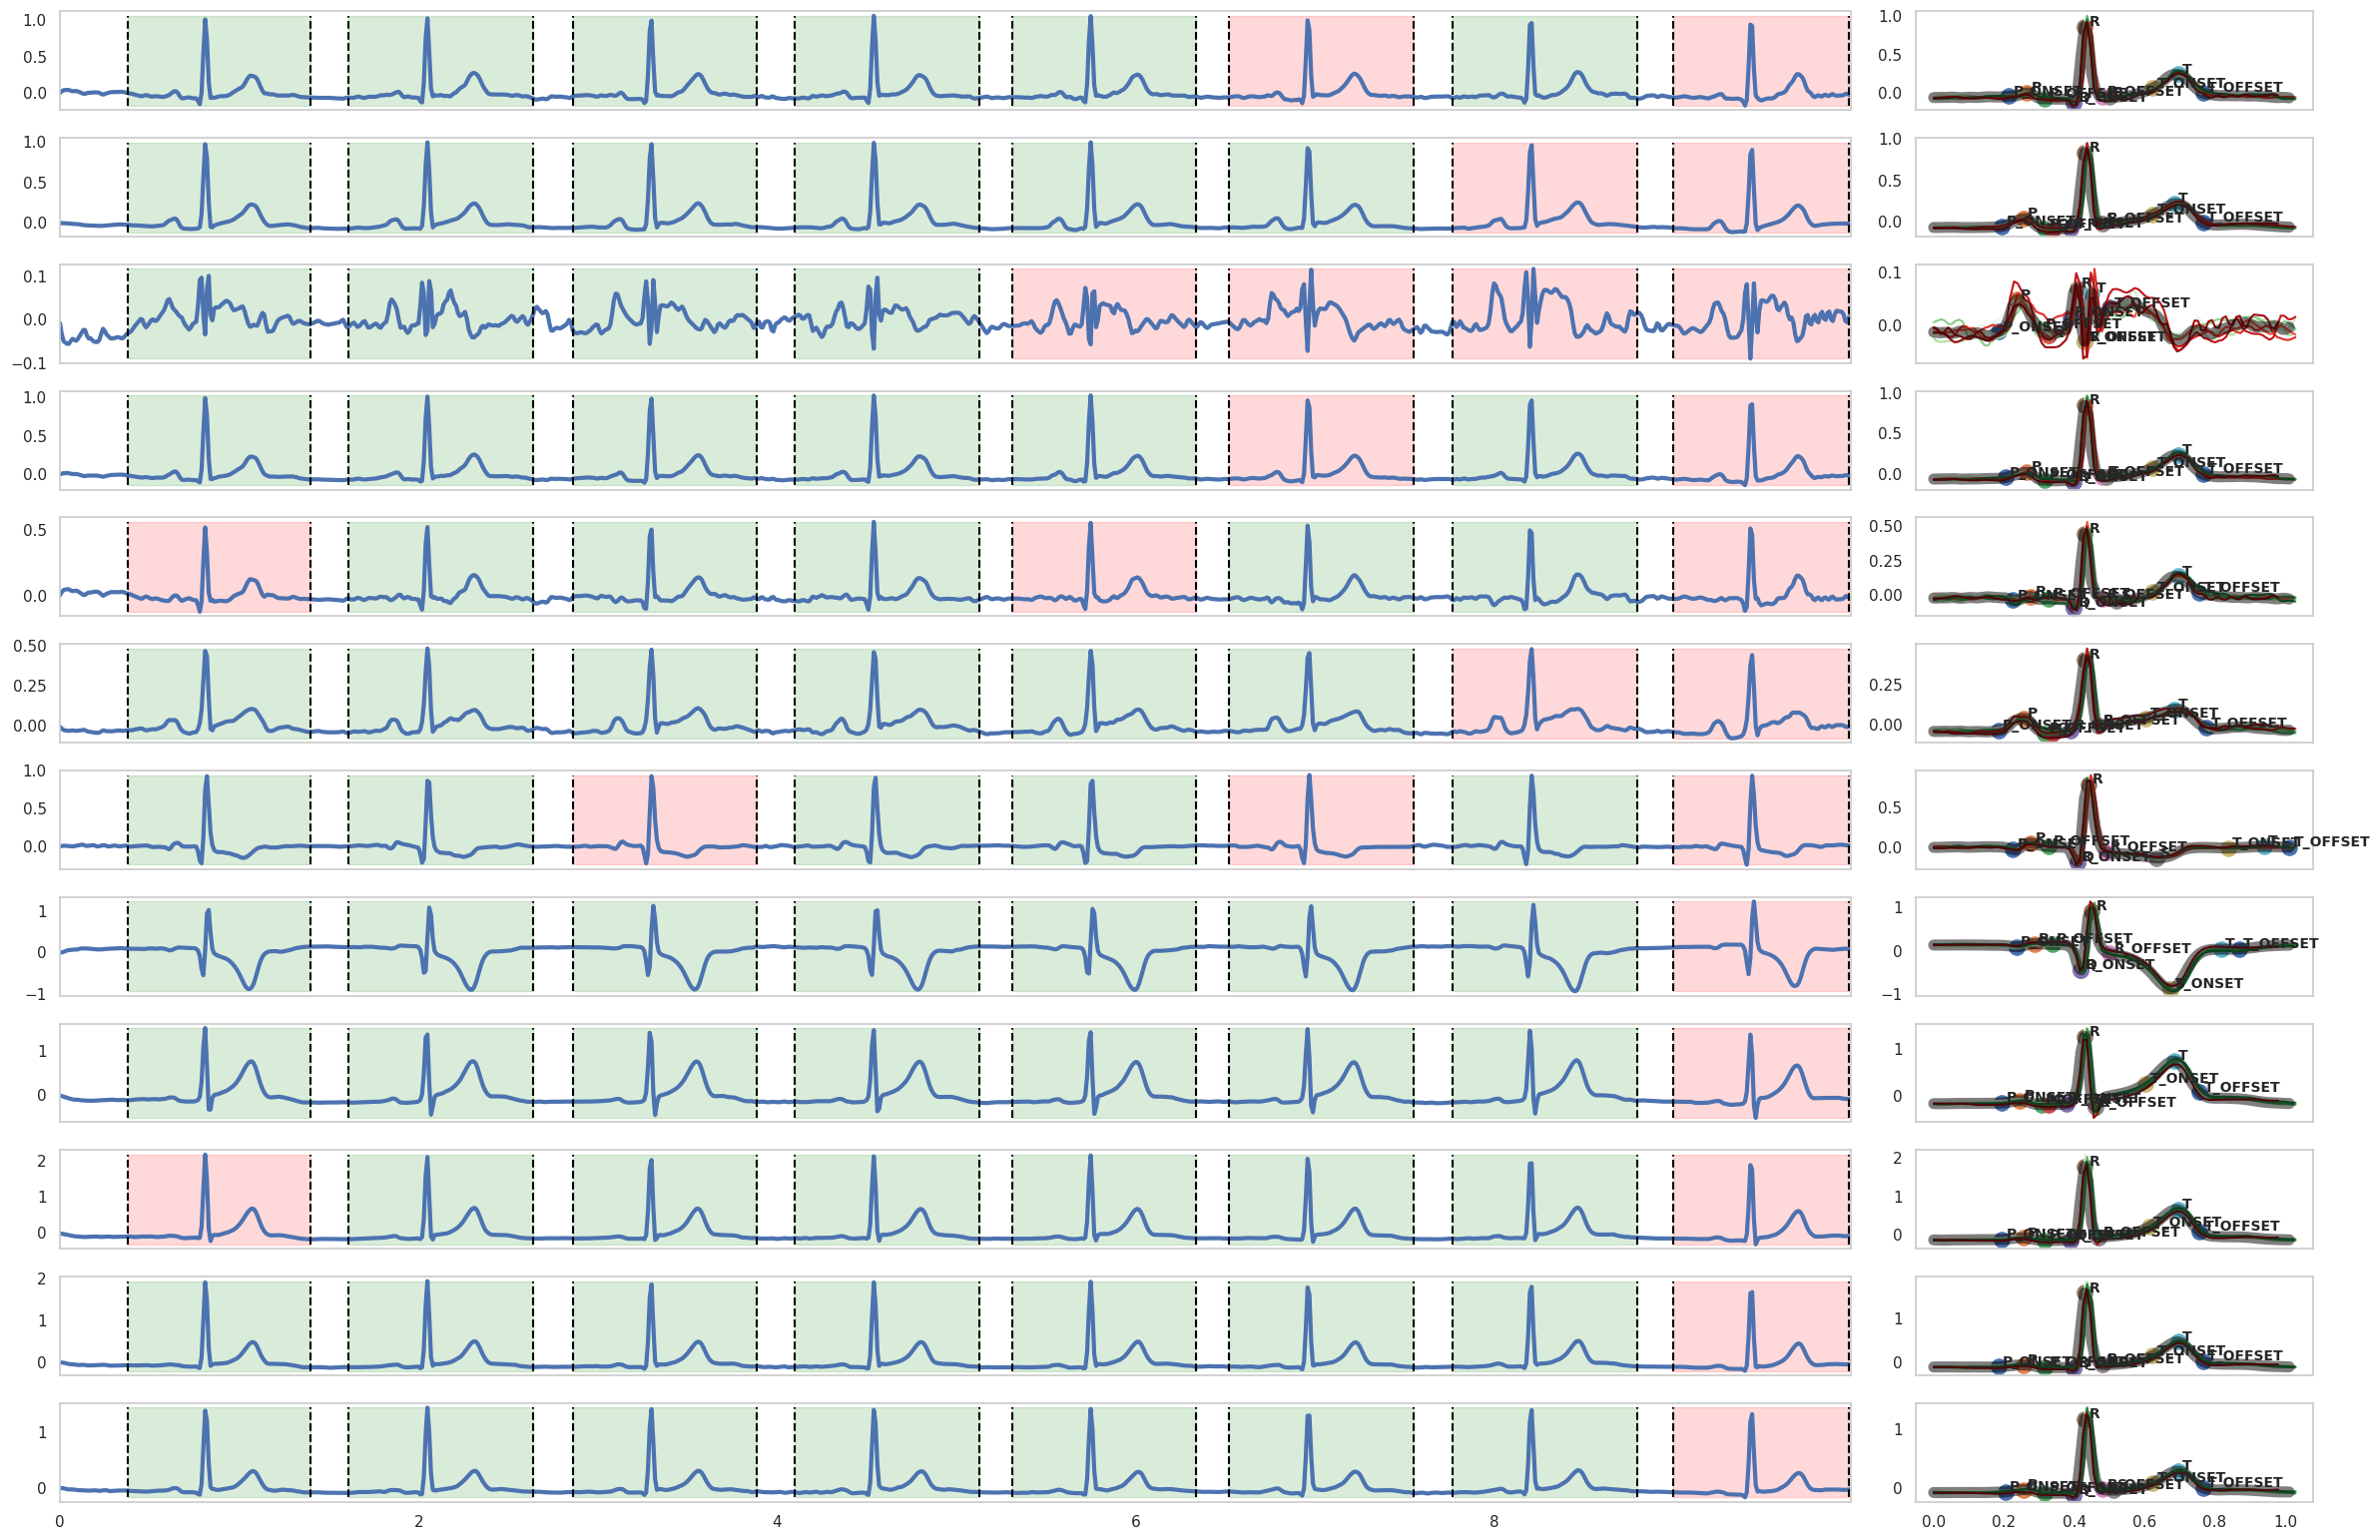

In [18]:
from msr.data.download.ptbxl import load_ptbxl_raw_tensors_for_split, FS
from msr.data.measurements import PtbXLMeasurement

data, targets = load_ptbxl_raw_tensors_for_split("val", "diagnostic_class")
data, targets = data.numpy(), targets.numpy()
sample = data[222]
measurement = PtbXLMeasurement(*sample.T, fs=FS)
measurement.set_beats(source_channel='ecg_2', align_to_peak=False)
measurement.set_agg_beat()
ecg_sig = measurement['ecg_1']
measurement.plot_beats_segmentation(invalid=False)

/home/shate/Desktop/praca_magisterska/medical_signal_representation/msr/signals/base.py:686: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=self.fig_params["fig_size"])


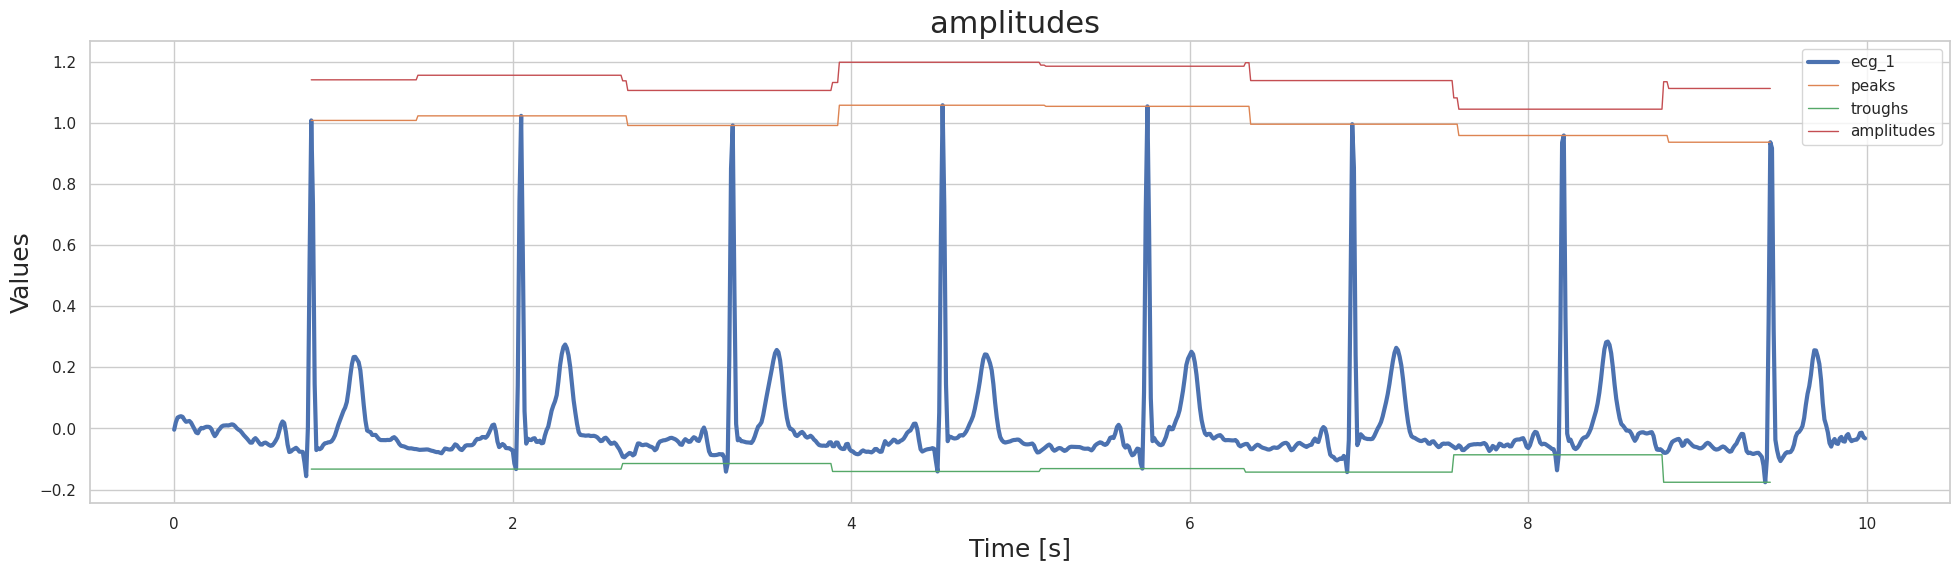

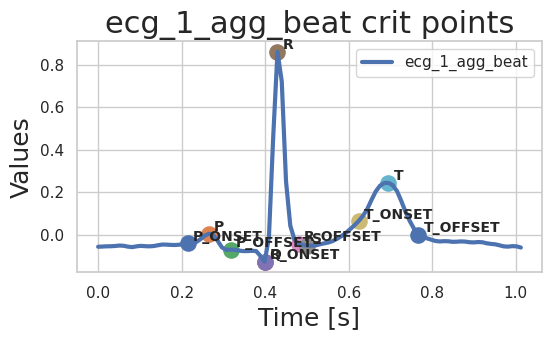

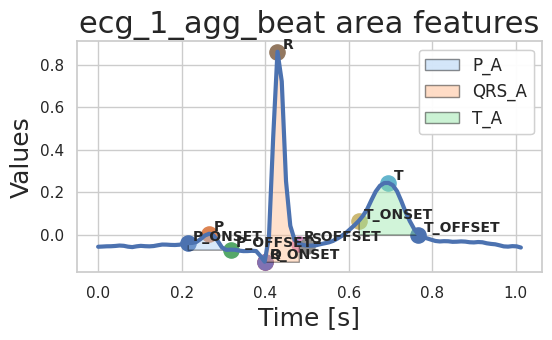

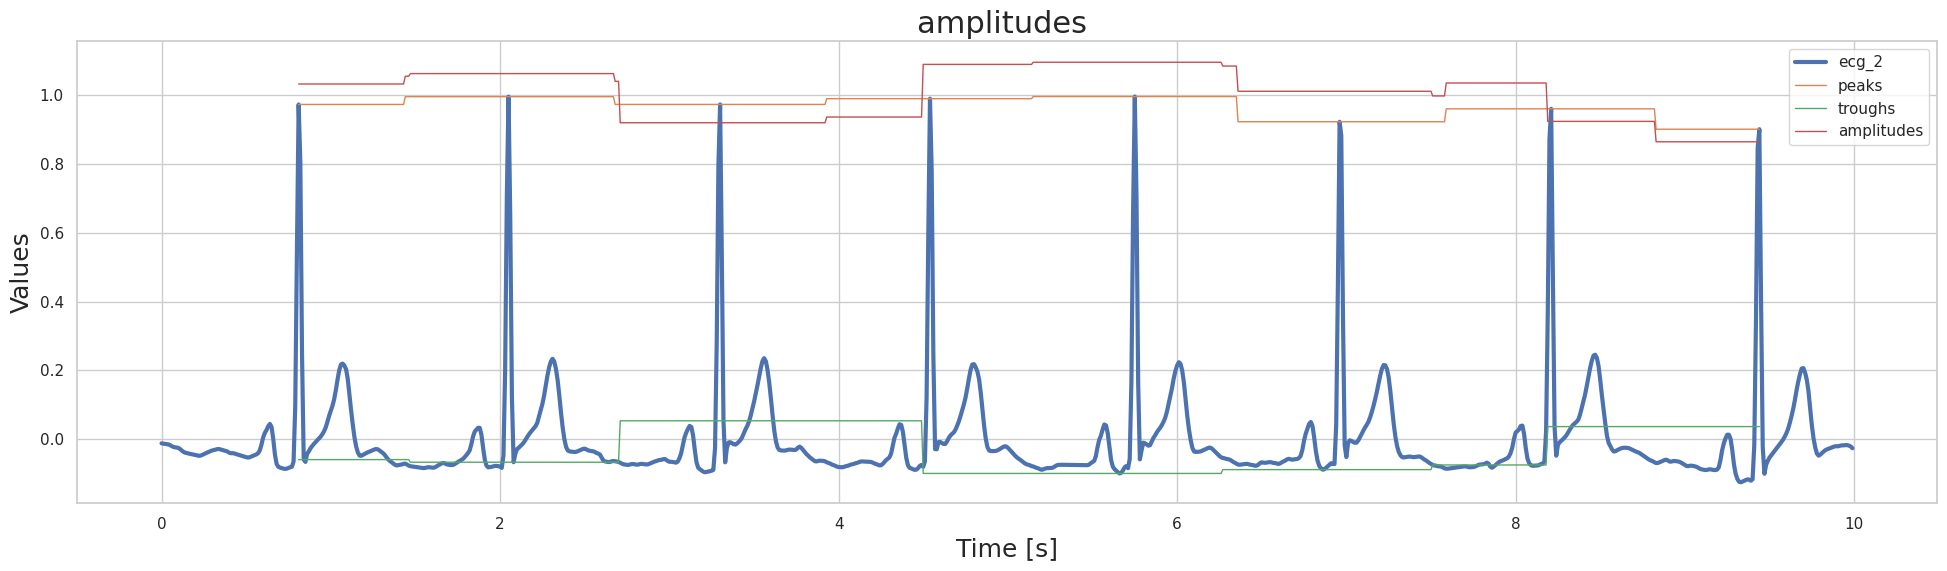

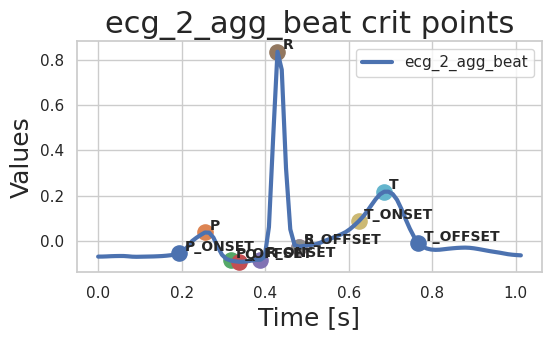

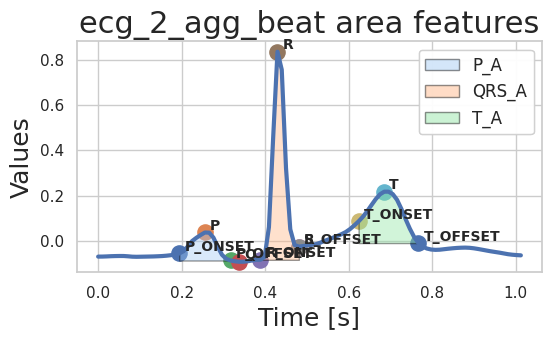

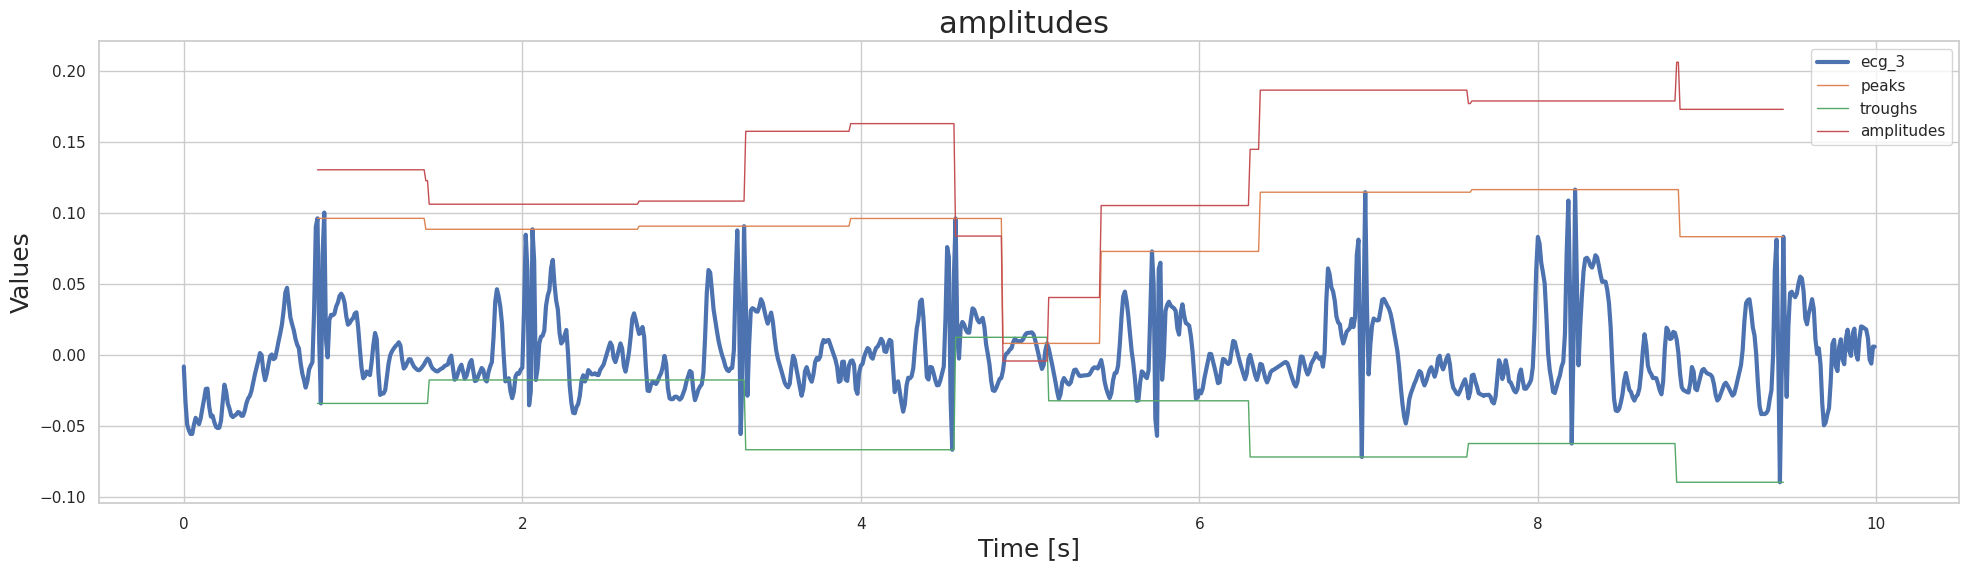

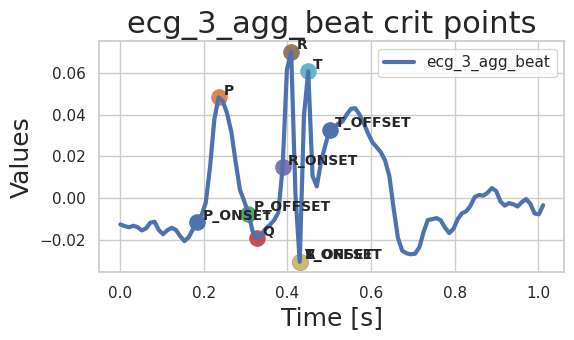

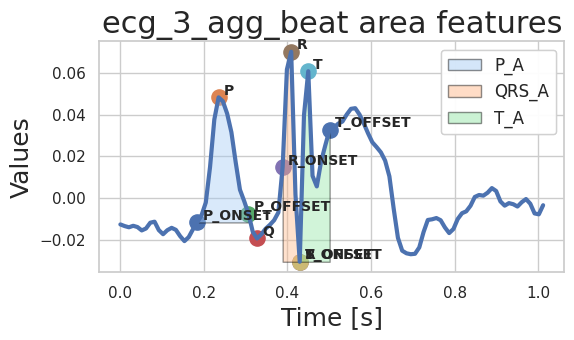

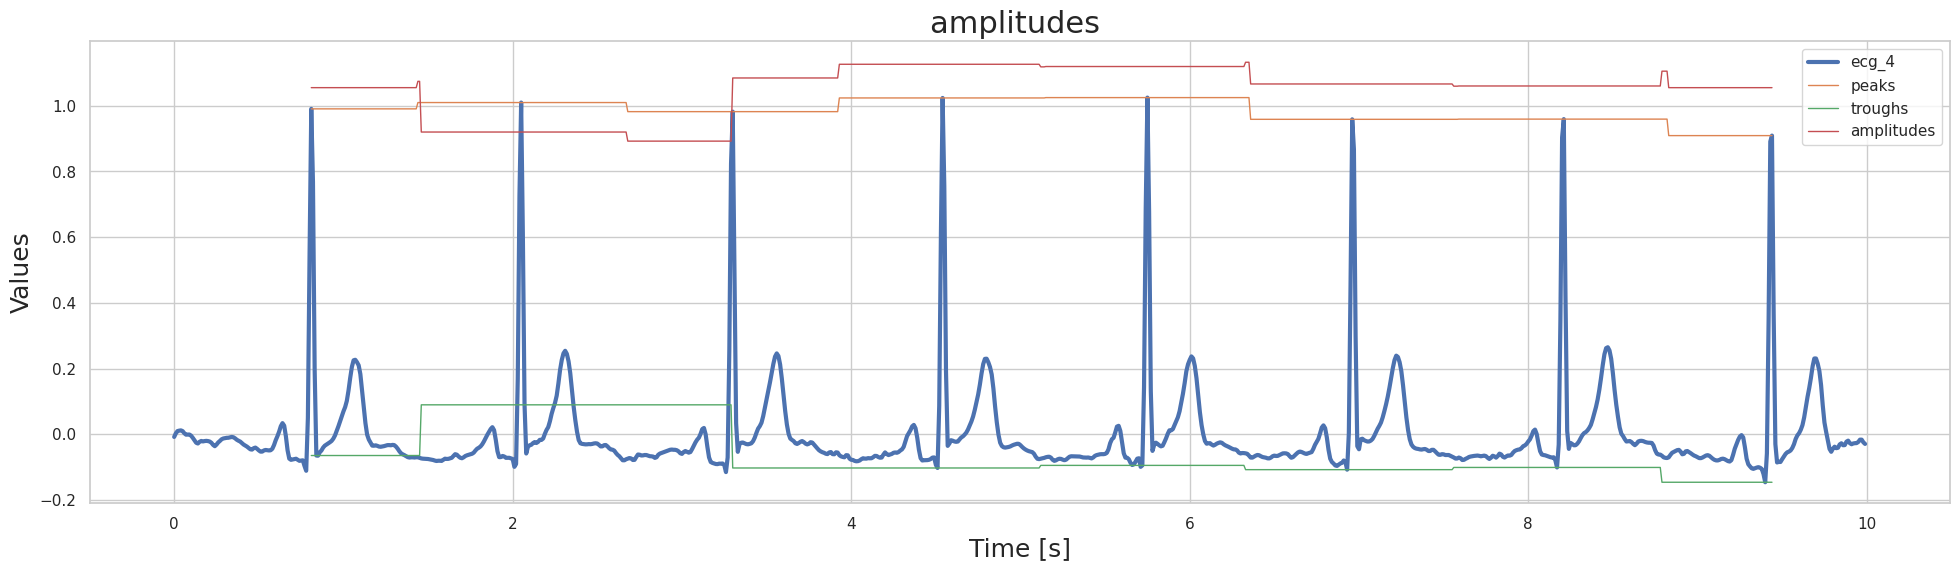

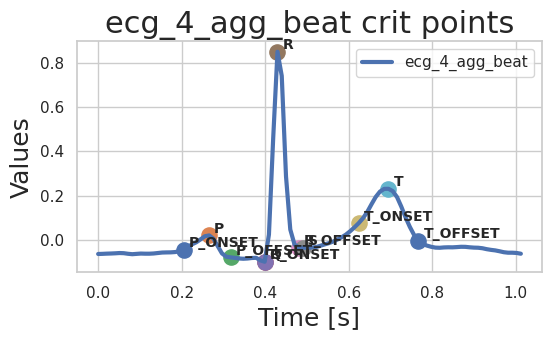

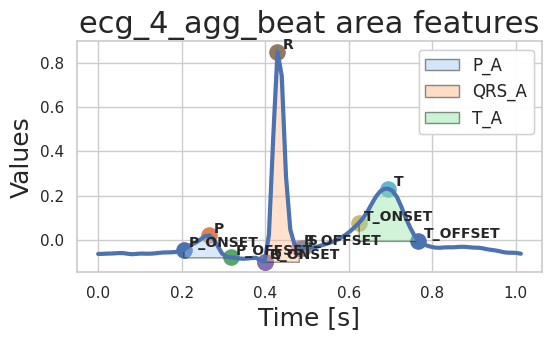

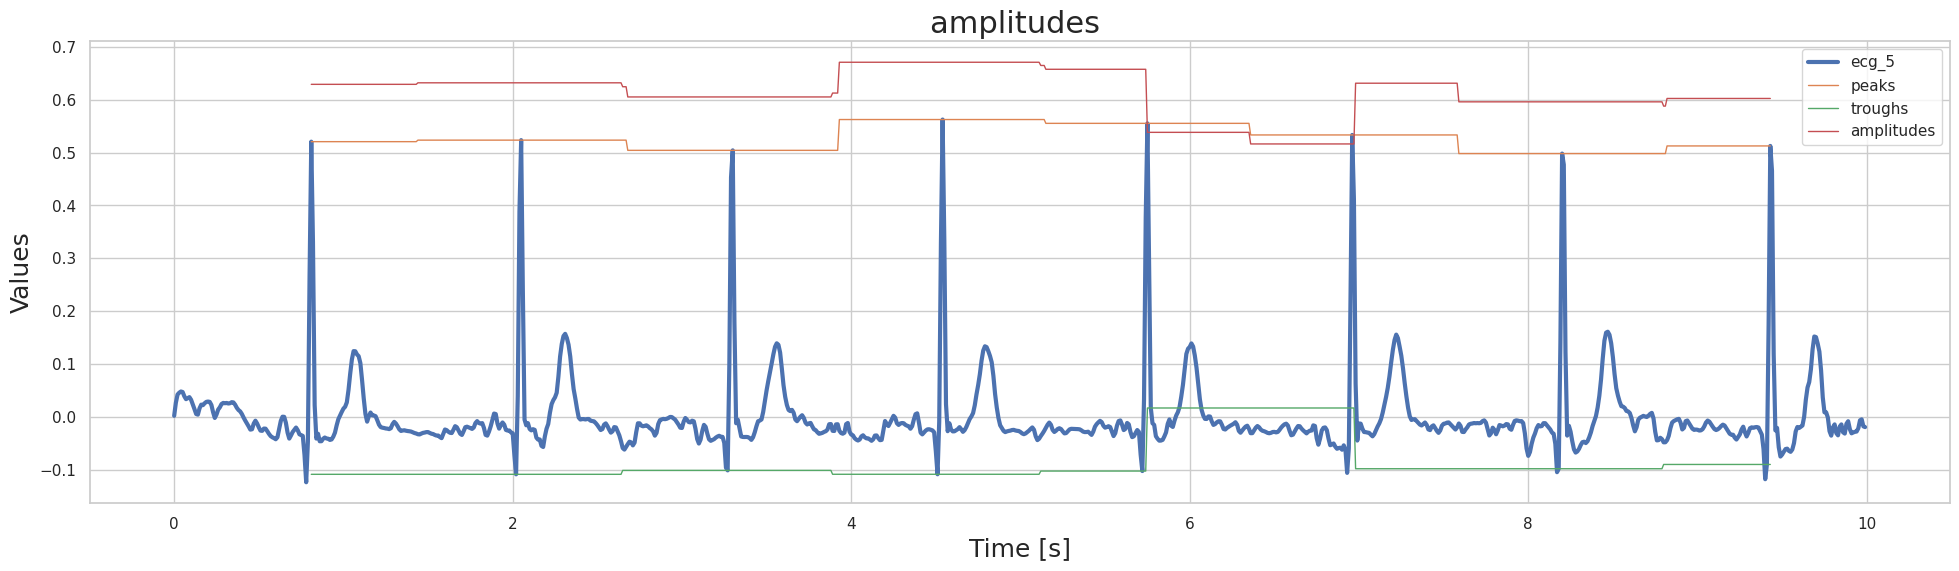

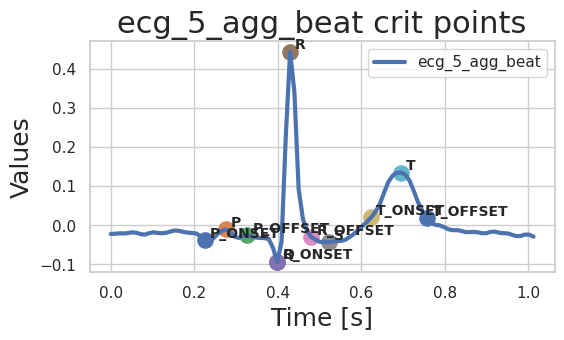

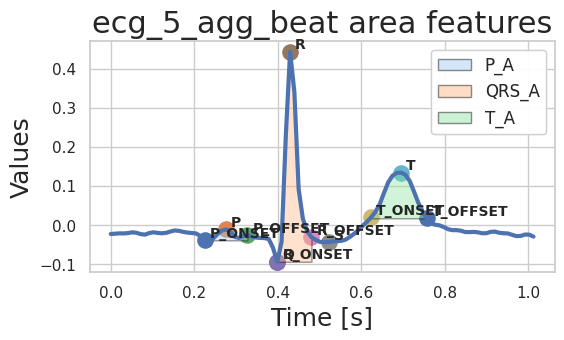

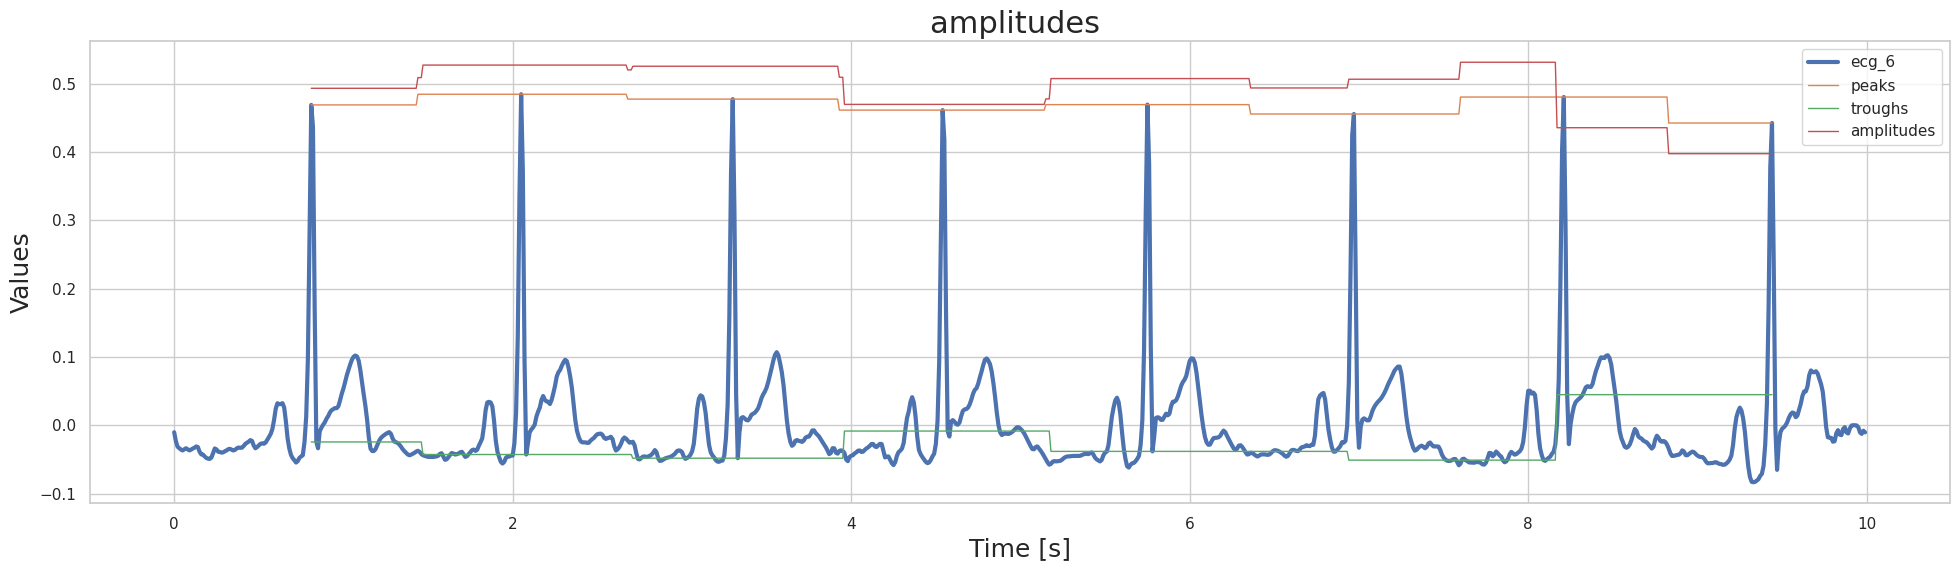

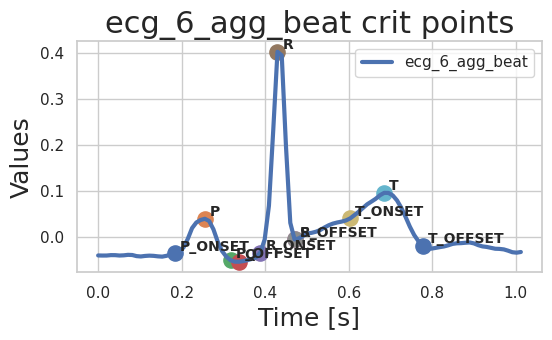

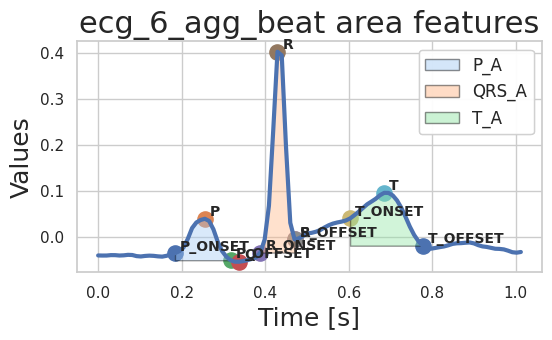

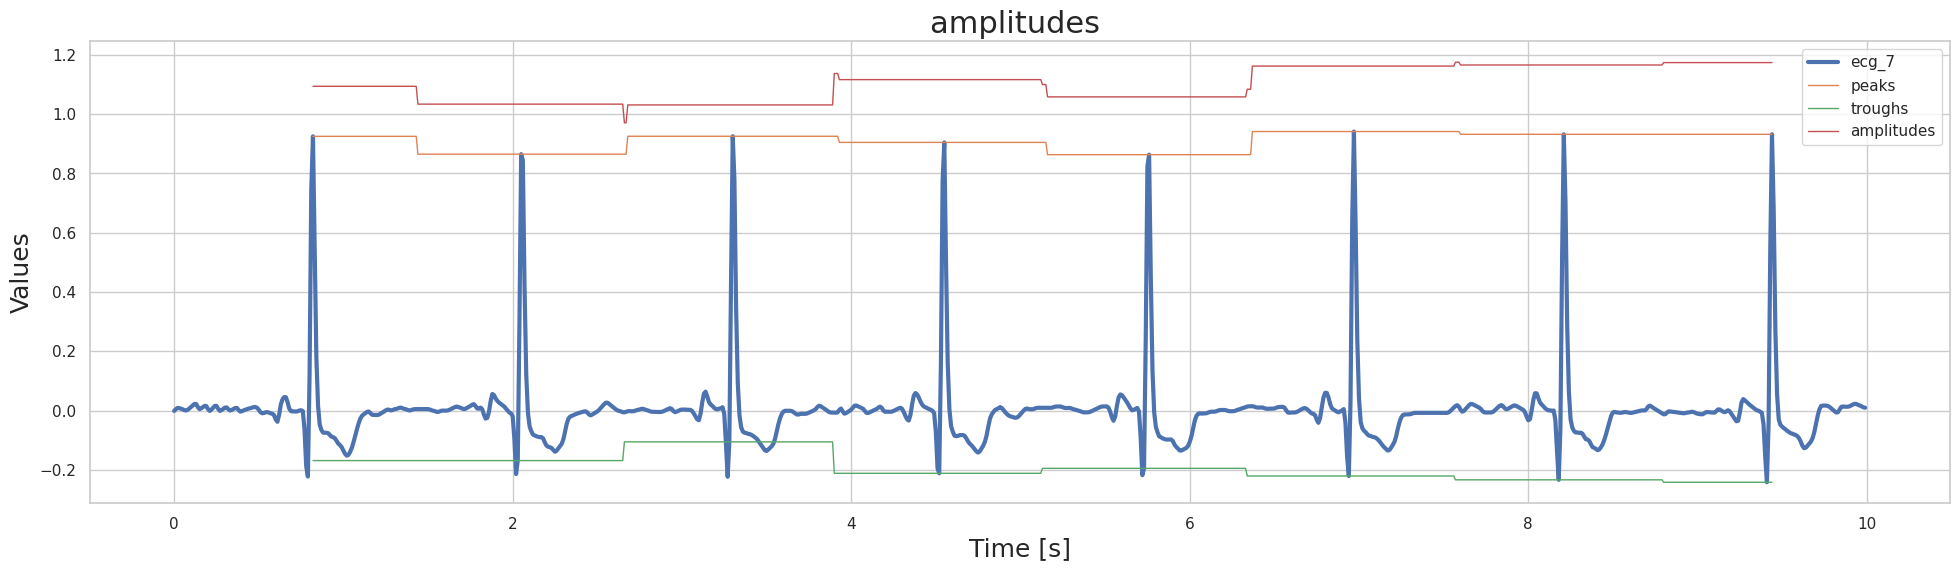

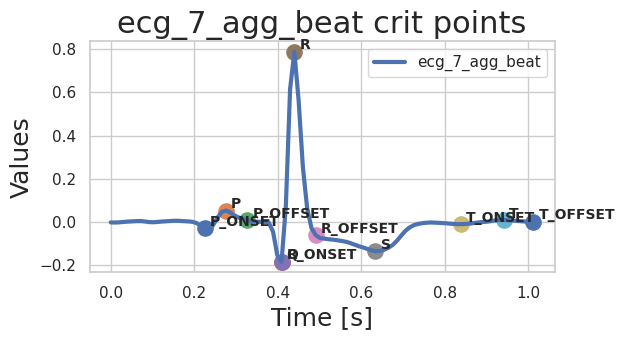

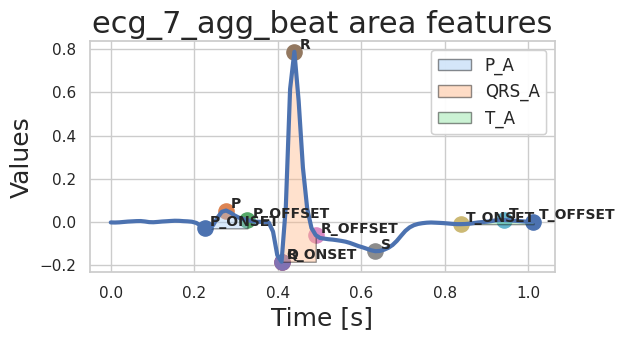

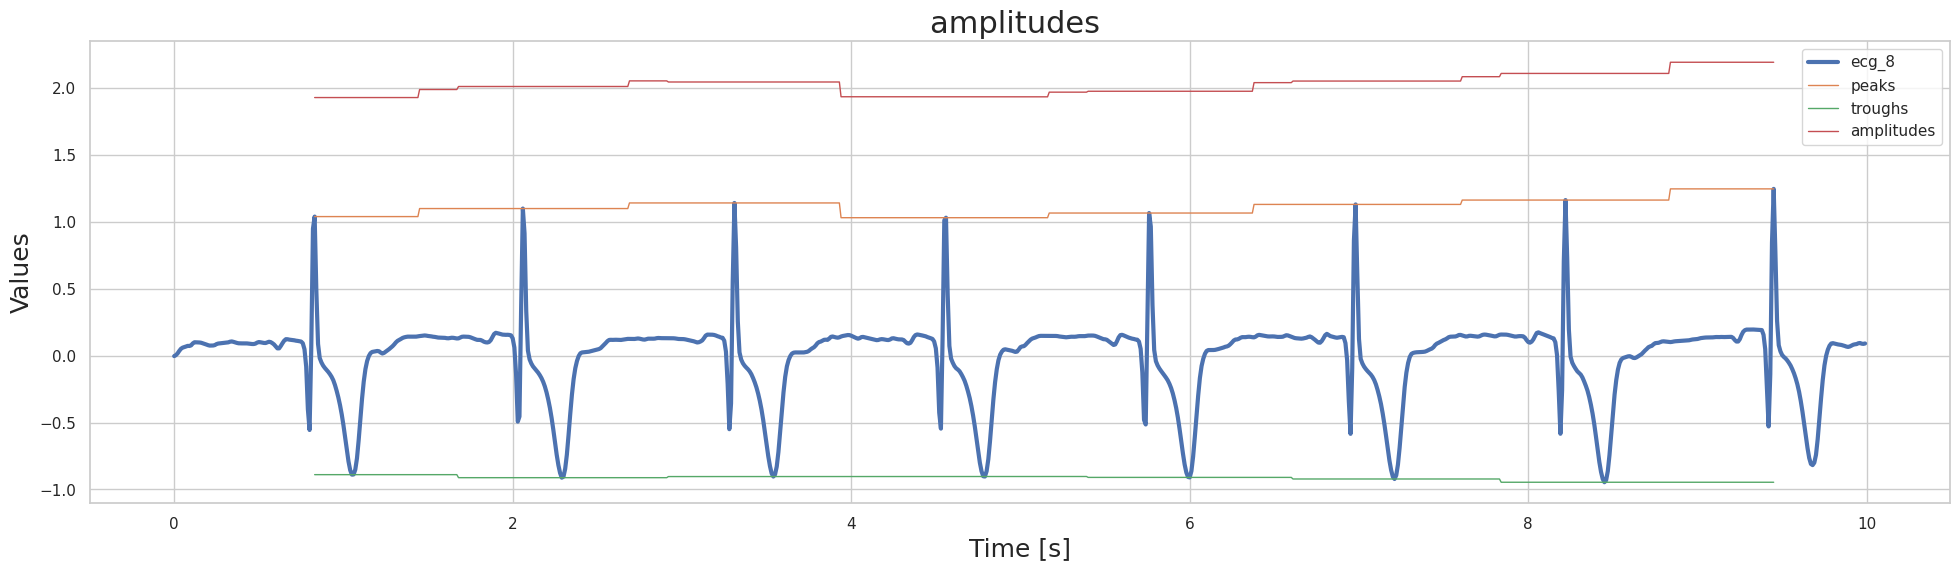

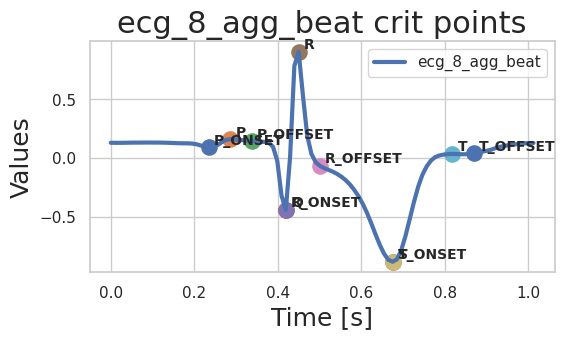

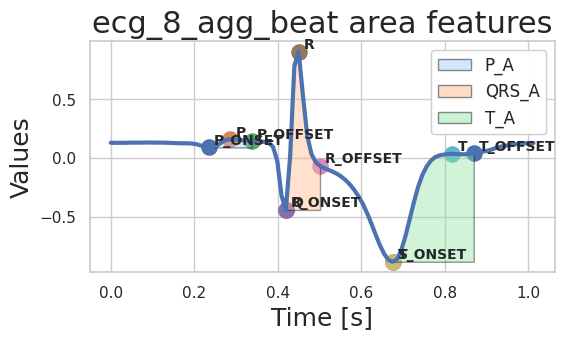

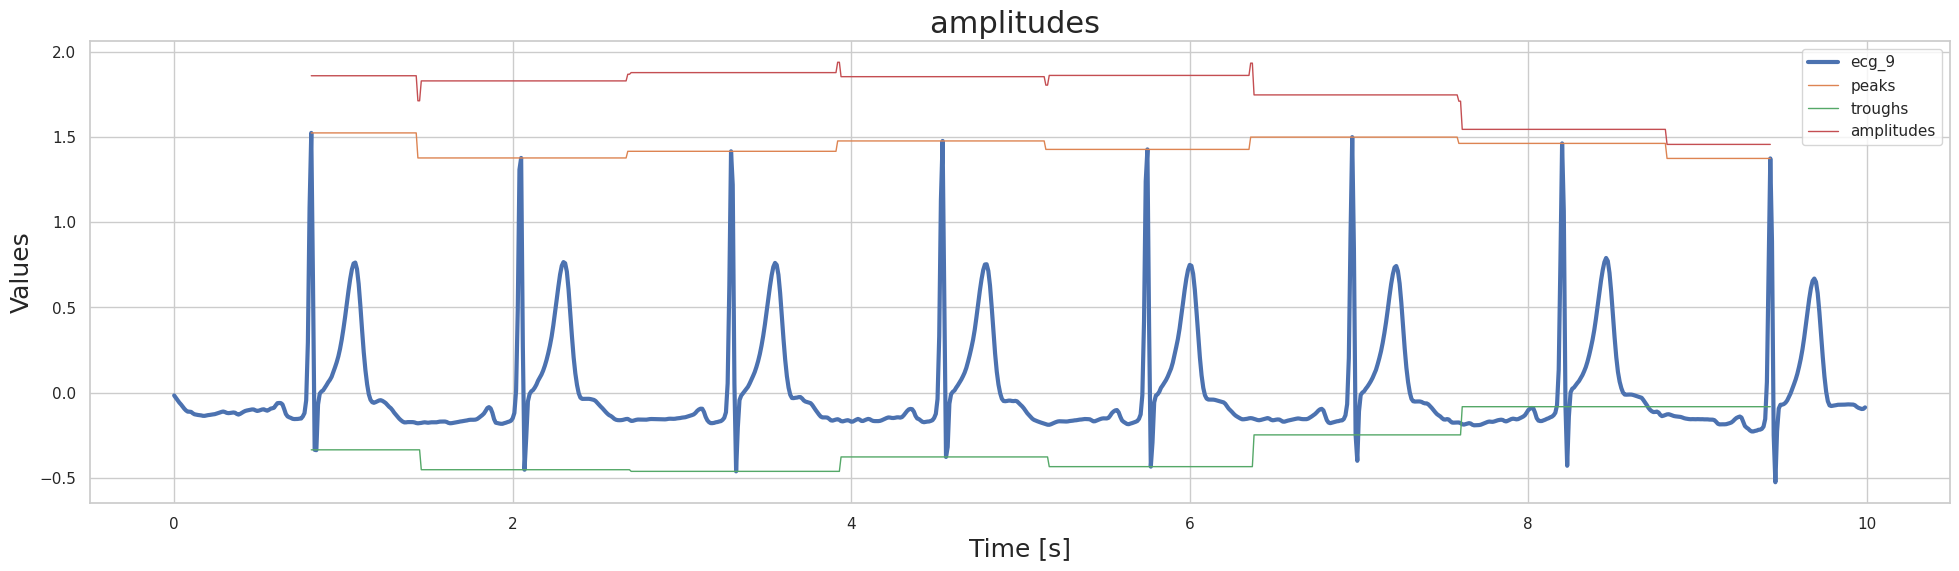

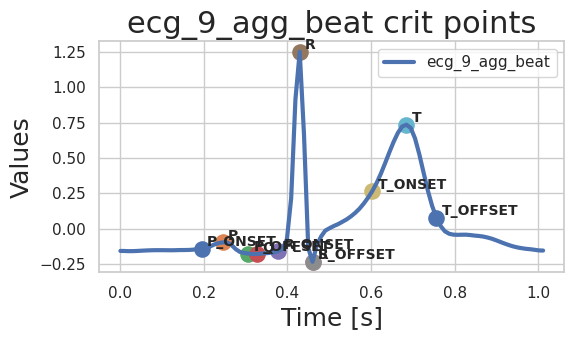

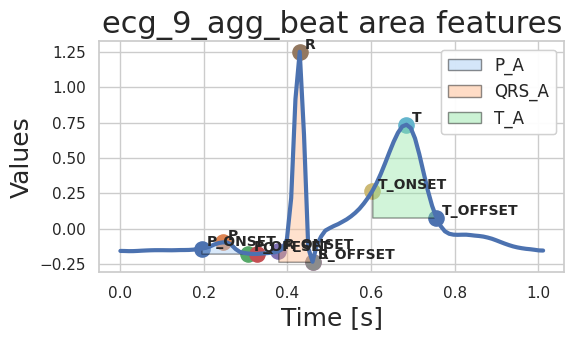

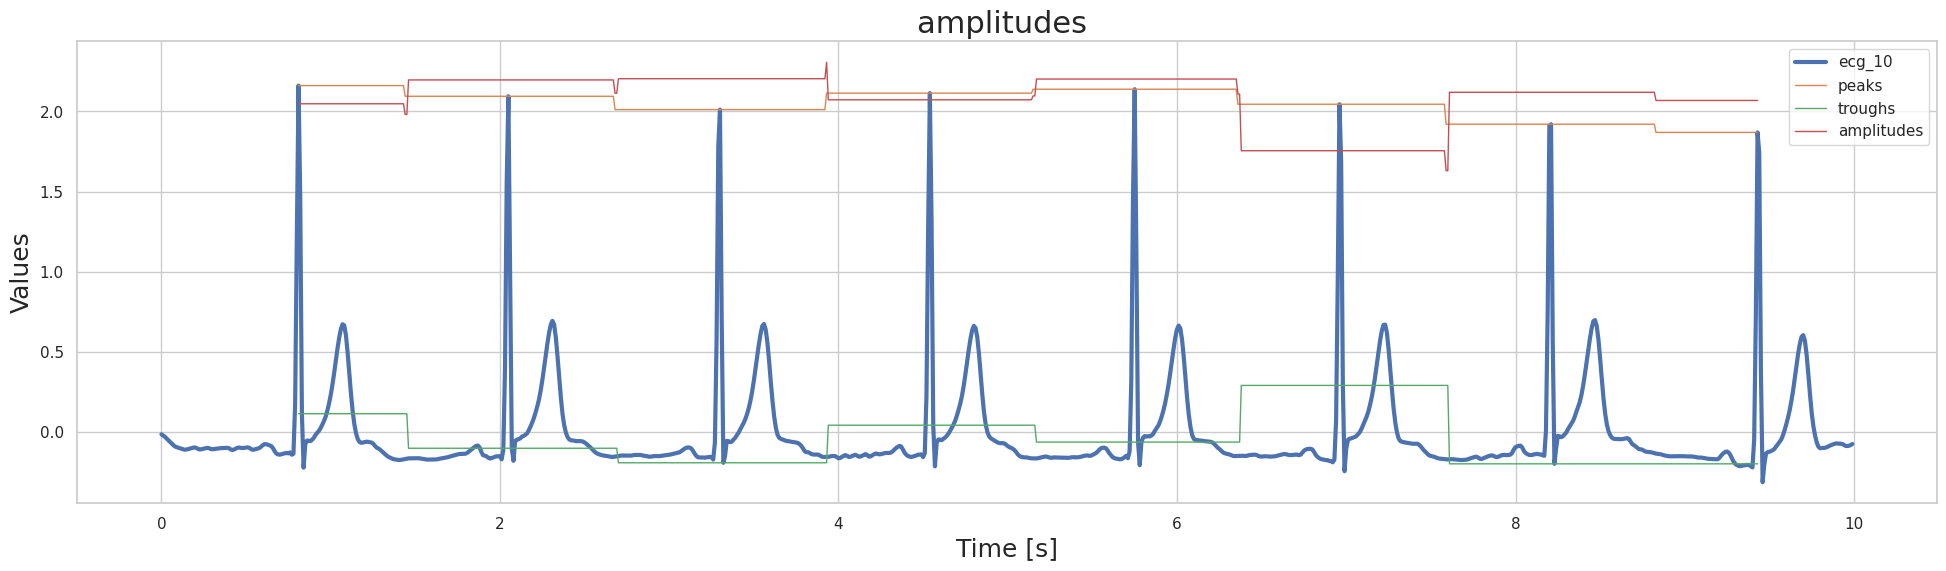

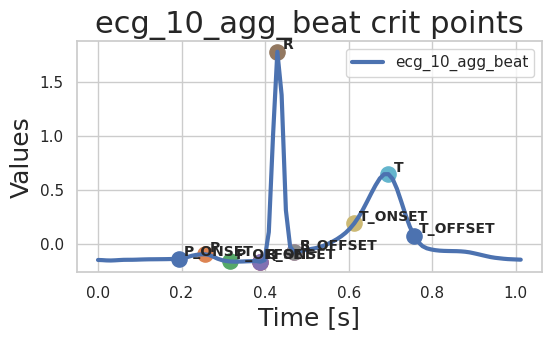

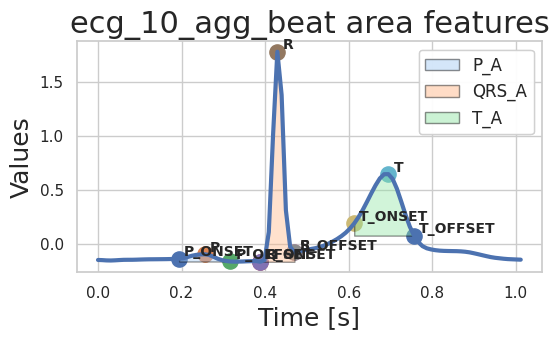

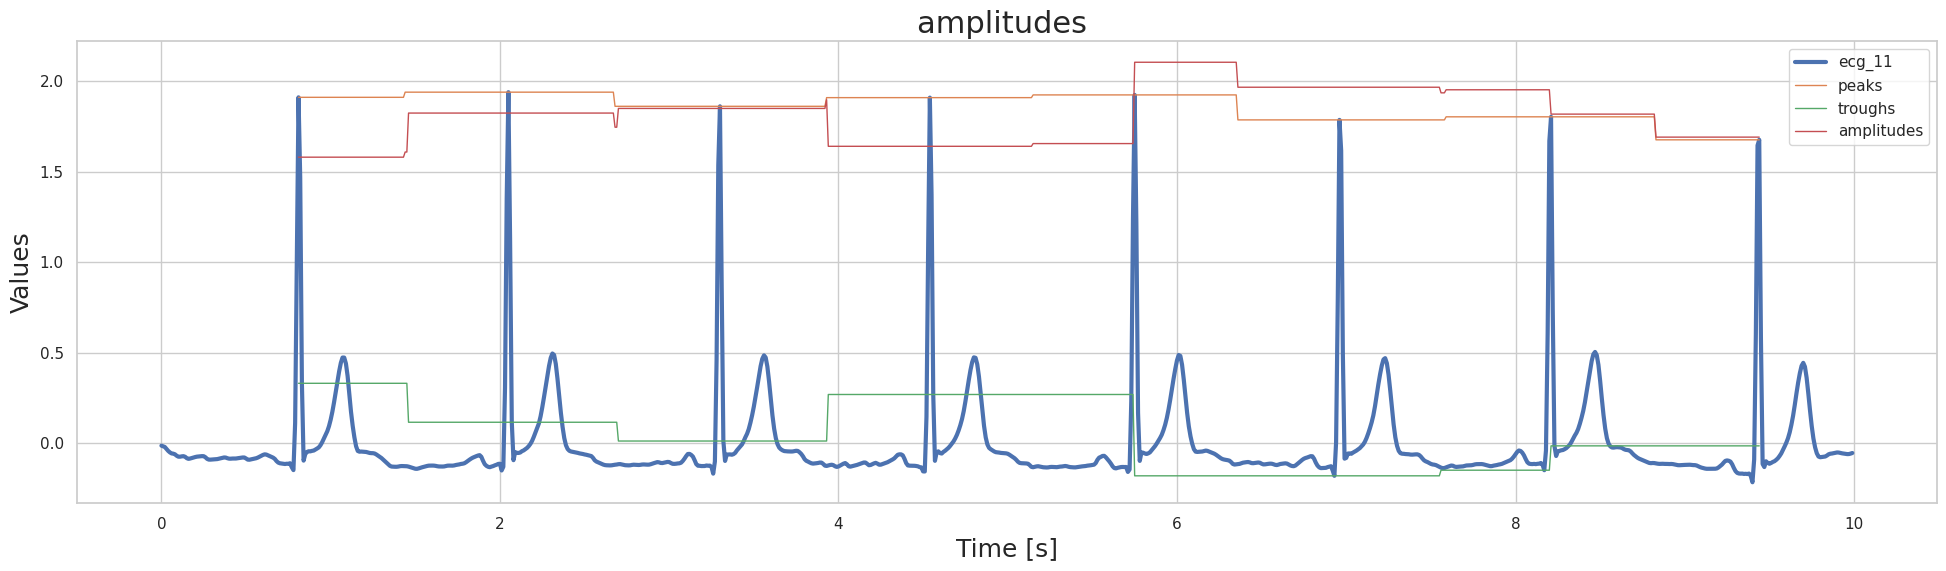

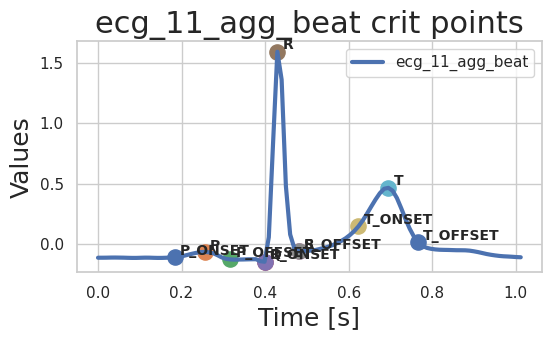

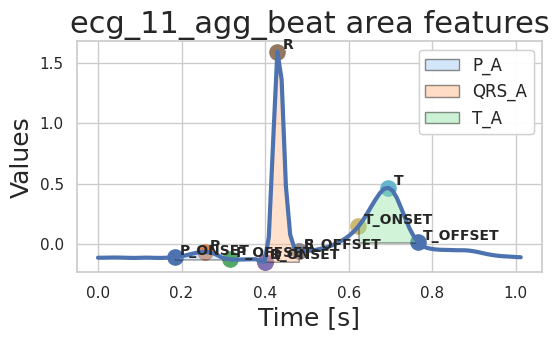

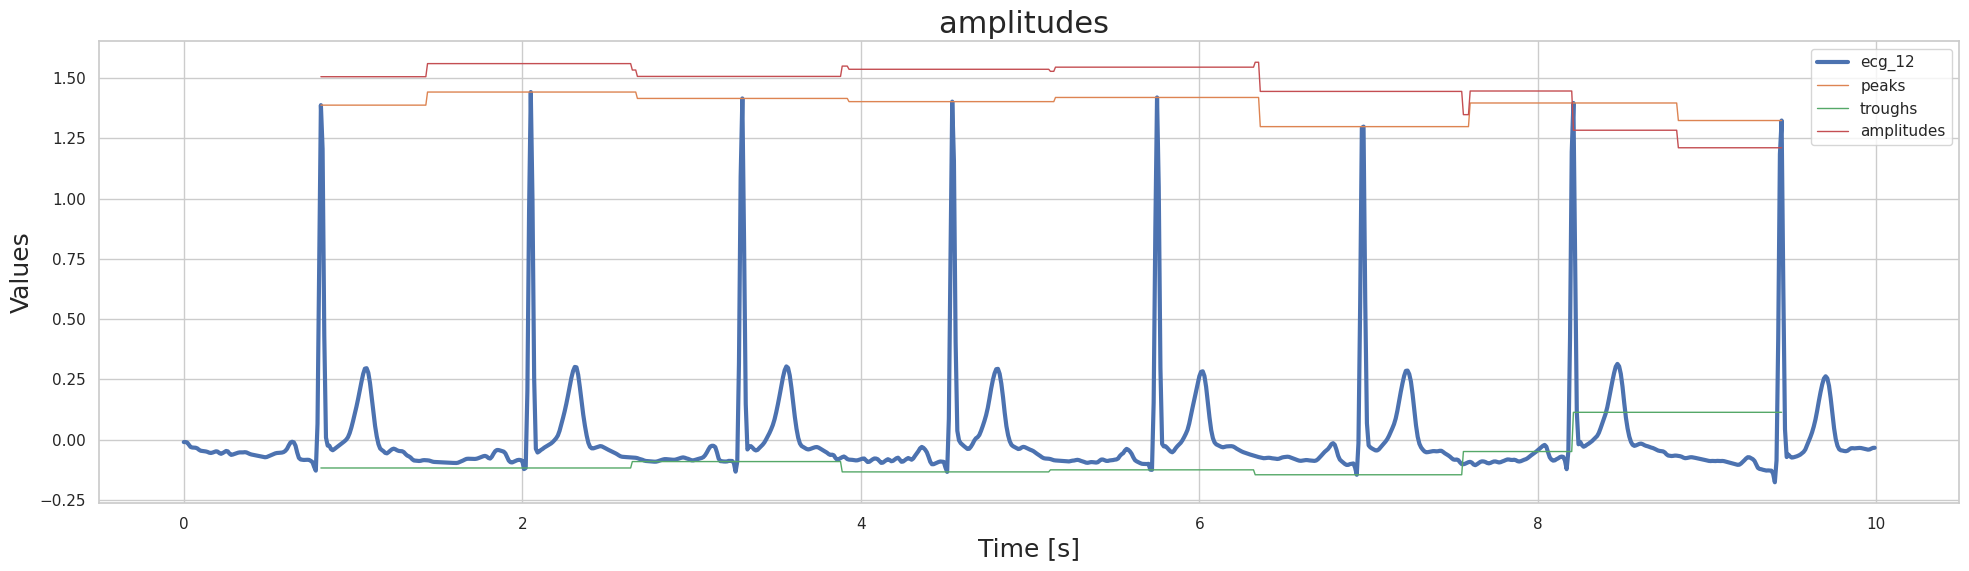

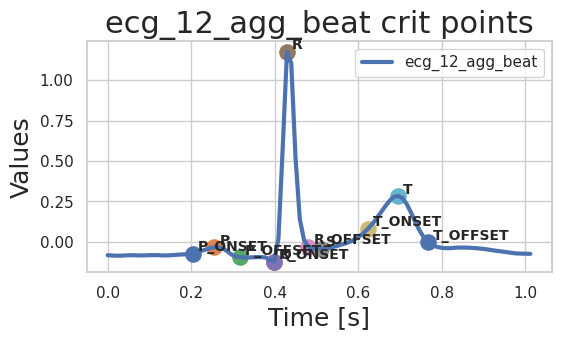

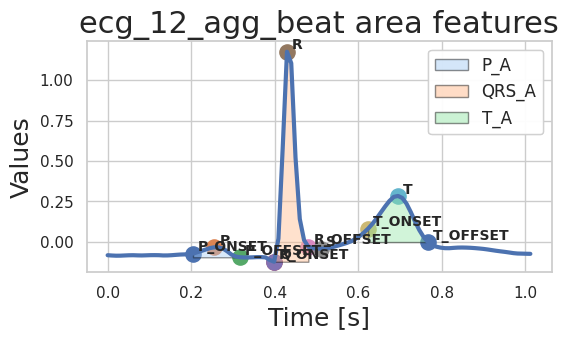

In [19]:
_ = measurement.extract_features(return_arr=False, plot=True)

In [20]:
_

{'ecg_1__basic__mean': 0.0032979999999999993,
 'ecg_1__basic__std': 0.17338548727041717,
 'ecg_1__basic__median': -0.036,
 'ecg_1__basic__skewness': 5.417417453787656,
 'ecg_1__basic__kurtosis': 35.35397363581296,
 'ecg_1__peaks_troughs__peaks__mean': 1.0067851638298486,
 'ecg_1__peaks_troughs__peaks__std': 0.03804668484535933,
 'ecg_1__peaks_troughs__peaks__median': 0.9950935275588535,
 'ecg_1__peaks_troughs__peaks__skewness': -0.17125595902362964,
 'ecg_1__peaks_troughs__peaks__kurtosis': -1.0150087911254664,
 'ecg_1__peaks_troughs__troughs__mean': -0.12892967589887558,
 'ecg_1__peaks_troughs__troughs__std': 0.02251414546037756,
 'ecg_1__peaks_troughs__troughs__median': -0.1327793833128479,
 'ecg_1__peaks_troughs__troughs__skewness': 0.3070196647632325,
 'ecg_1__peaks_troughs__troughs__kurtosis': 0.33880205874700353,
 'ecg_1__peaks_troughs__amplitudes__mean': 1.1357148397287242,
 'ecg_1__peaks_troughs__amplitudes__std': 0.04782527500956481,
 'ecg_1__peaks_troughs__amplitudes__median'